In [1]:
print('hello world')

hello world


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np  
import pandas as pd 

import os

In [4]:
data = pd.read_csv(r"/content/drive/MyDrive/Datasets/Human Activity Recognition UCI dataset/train.csv")

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

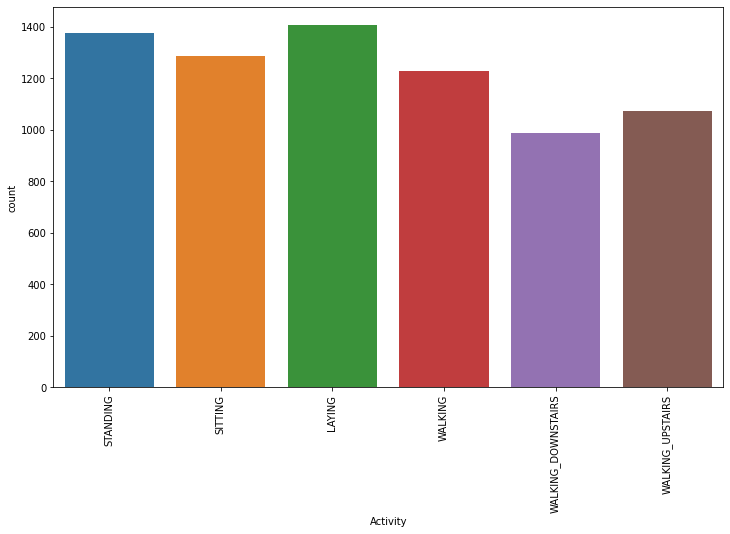

In [6]:
# count = data['Activity'].value_counts()
# count.plot.bar()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

ax = sns.countplot(x = "Activity", data = data)
plt.xticks(x = data["Activity"], rotation = 'vertical')
plt.show()

In [7]:
# data2 = data.copy()
# x = data2.iloc[:-1]
# activity_count = np.array(x.value_counts())
# activity=sorted(x.unique())



# plt.figure(figsize=(10,10))
# plt.pie(activity_count,labels=activity,autopct = '%0.2f');



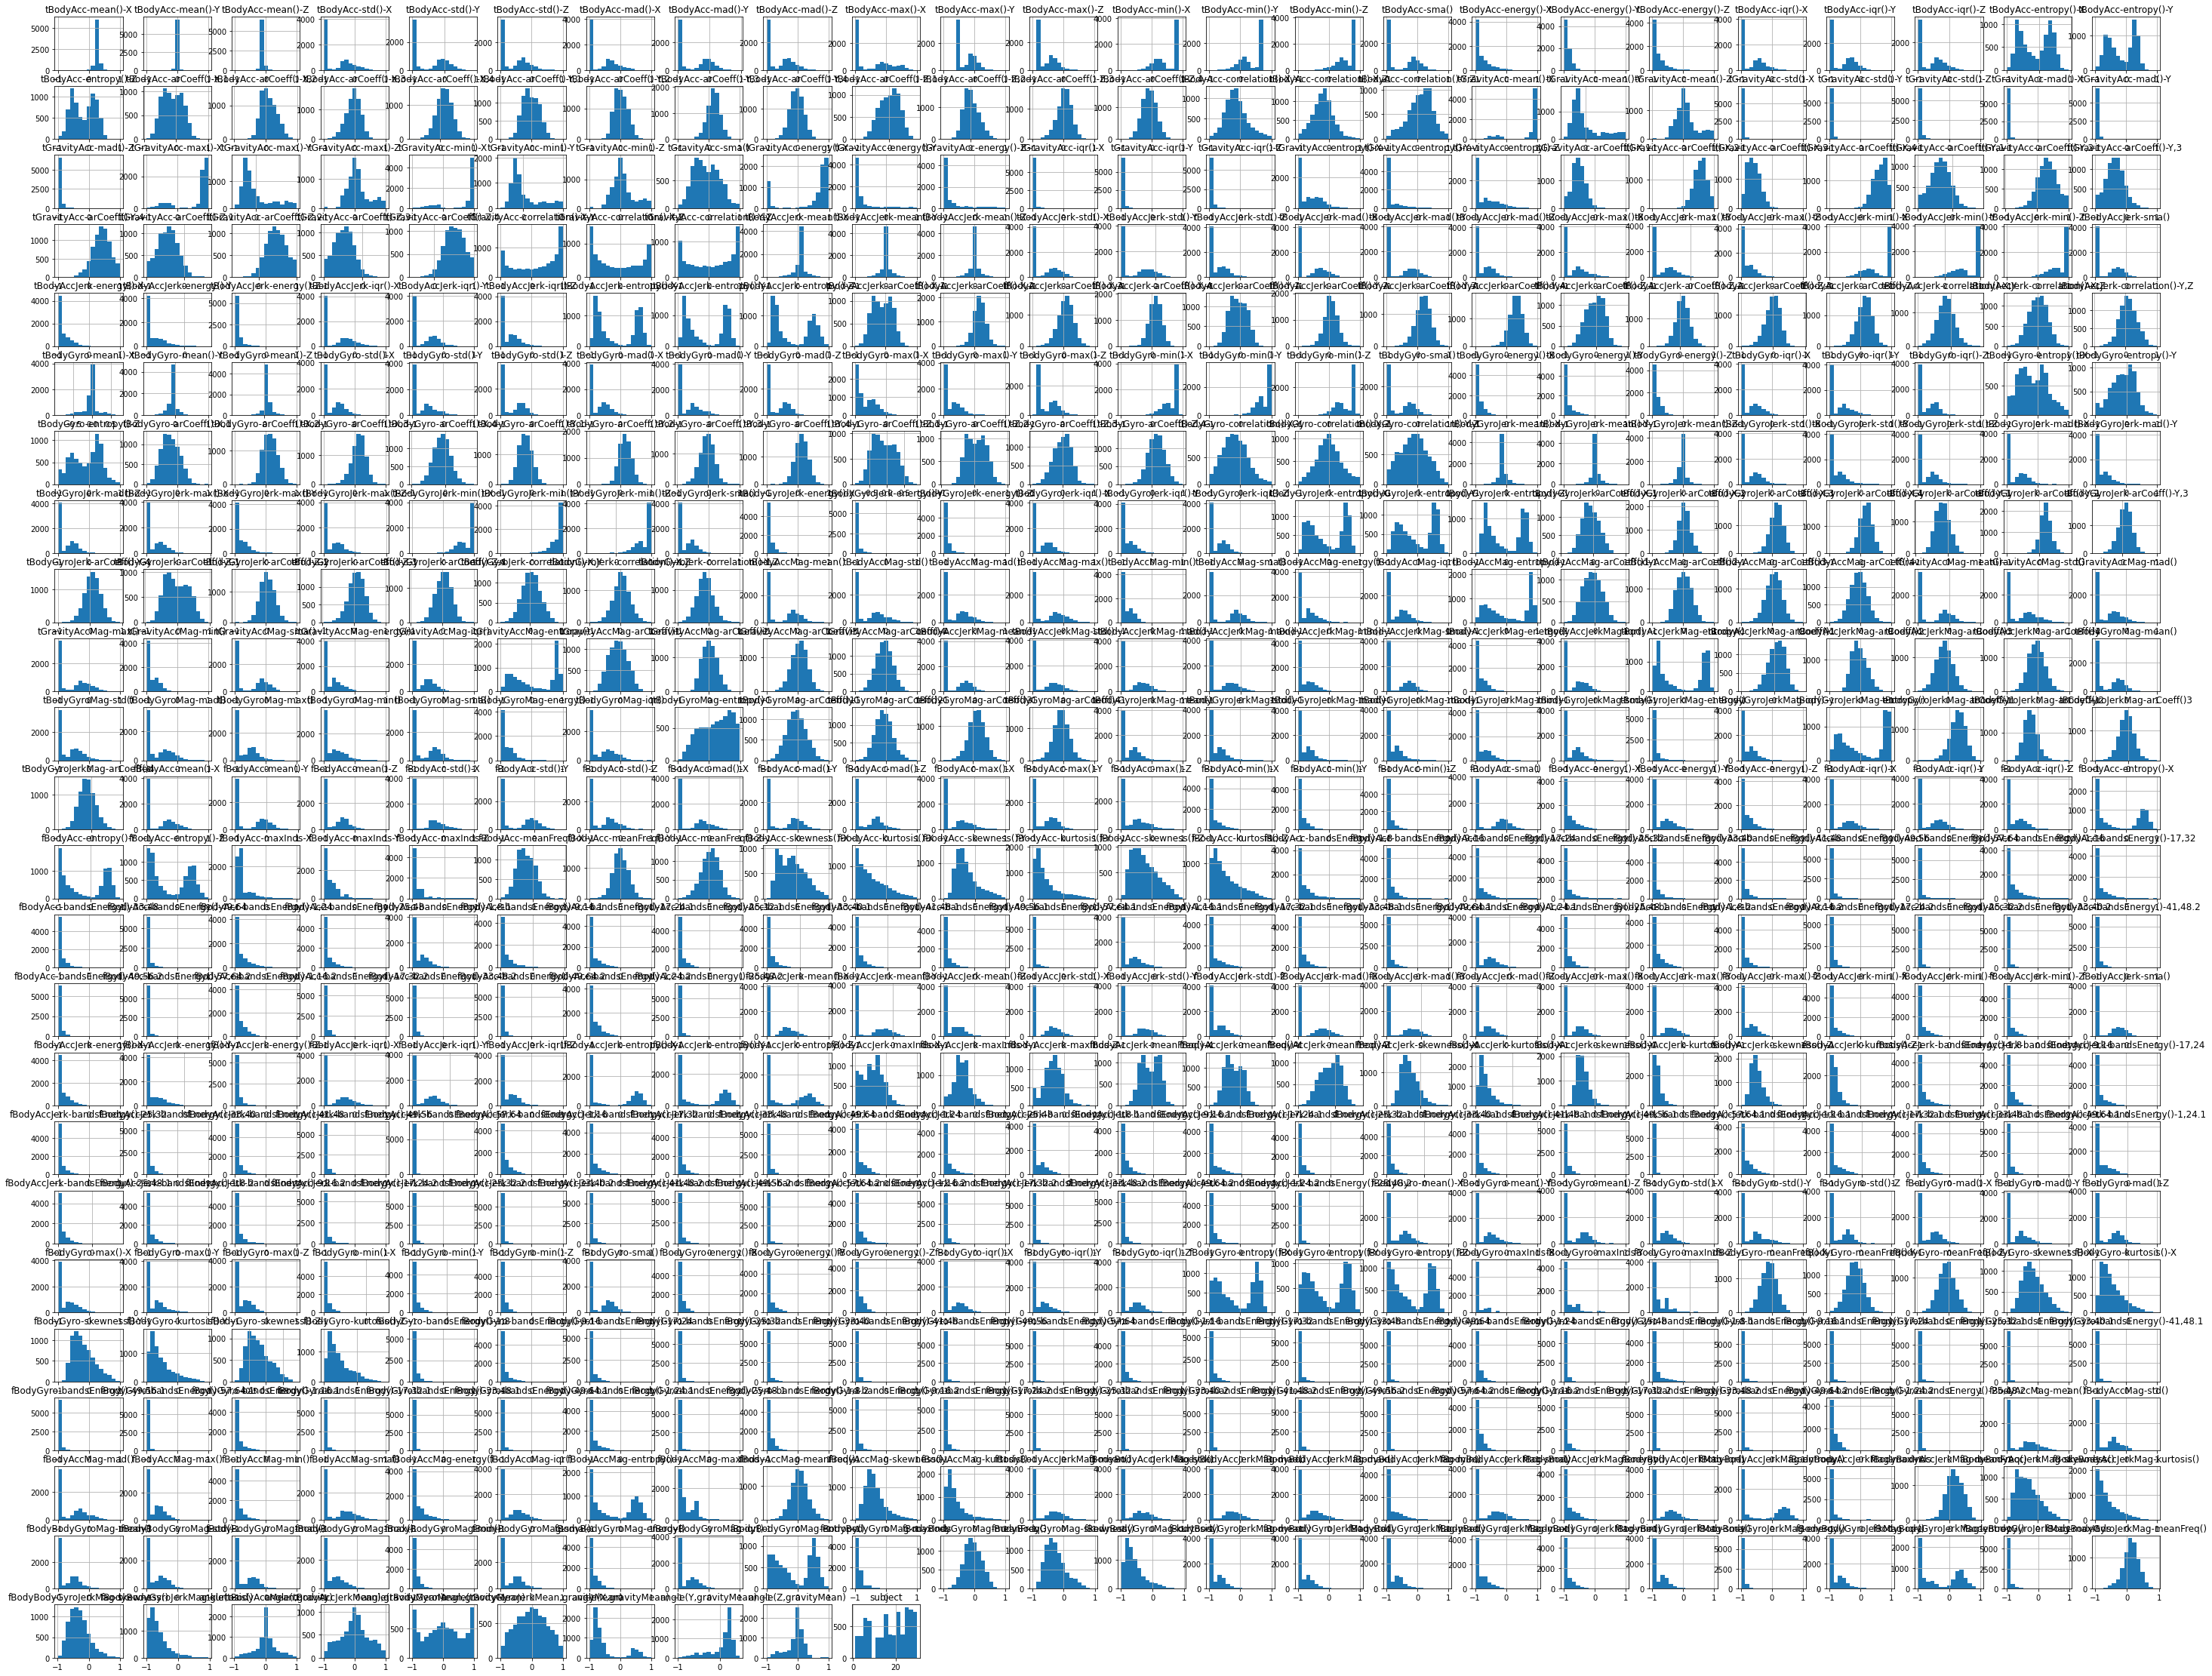

In [8]:
data.hist(figsize=(50,40),bins = 15)
plt.title("Features Distribution")
plt.show()

In [9]:
accelerometer_counter = 0
gyrometer_counter = 0
other_features = 0
for i in data.columns:
    if "Acc" in str(i):
      accelerometer_counter+=1
    elif "Gyro" in str(i):
      gyrometer_counter+=1
    else:
      other_features+=1
print(accelerometer_counter, gyrometer_counter, other_features)

345 213 5


<BarContainer object of 3 artists>

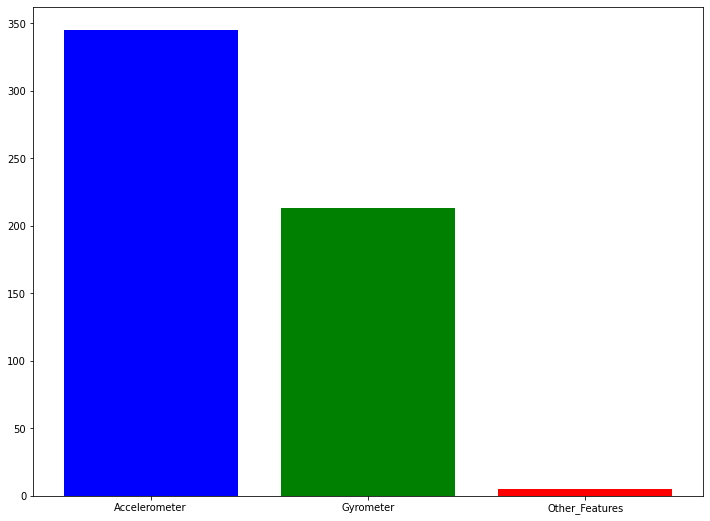

In [10]:
plt.figure(figsize = (12,9))

plt.bar(['Accelerometer','Gyrometer','Other_Features'], [accelerometer_counter, gyrometer_counter, other_features],color = ['b','g','r'])

In [11]:
data.shape

(7352, 563)

In [12]:
# plt.figure(figsize=(15,15))
# p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [13]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

In [14]:
data = data.dropna()

In [15]:
mapping = {
    'LAYING' : 1,
    'STANDING' : 2,
    'SITTING' : 3,
    'WALKING': 4,
    'WALKING_UPSTAIRS':5,
    'WALKING_DOWNSTAIRS': 6
}

In [16]:
data2 = data.copy()

data2.drop('Activity',axis=1)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.99570

In [17]:
data.shape

(7352, 563)

In [18]:
training_accuracy_dict = {}
testing_accuracy_dict = {}


## **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [20]:
X = data.drop(labels = 'Activity',axis=1)
y = data['Activity'].replace(mapping).values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 23)


In [21]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred=logReg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)

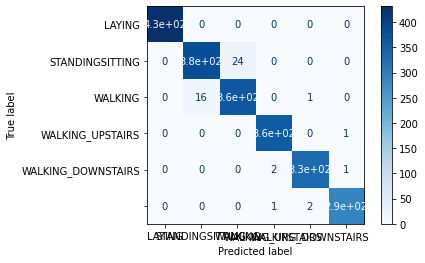

In [23]:
class_names = ['LAYING','STANDING''SITTING','WALKING','WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
disp = plot_confusion_matrix(logReg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

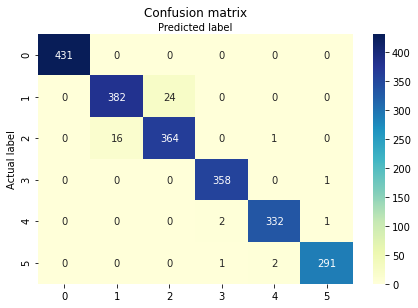

In [25]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Checking Model's Accuracy on Training Set (Logistic Regression)**




In [26]:
training_accuracy_dict["Logistic_Regression"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9782411604714415


In [27]:
# X_validation = test_Data.drop(labels = 'Activity',axis=1)
# y_validation = test_Data['Activity'].replace(mapping).values
# y_pred_validation=logReg.predict(X_validation)
# print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))

In [28]:
training_accuracy_dict

{'Logistic_Regression': 0.9782411604714415}

## **Checking Accuracy on The Test Set (Logistic Regression)**

In [29]:
test_Data =  pd.read_csv(r"/content/drive/MyDrive/Datasets/Human Activity Recognition UCI dataset/test.csv")

X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values

In [30]:
y_pred_validation=logReg.predict(X_validation)

In [31]:
testing_accuracy_dict["Logistic_Regression"] = metrics.accuracy_score(y_pred_validation, y_validation)
print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))

Accuracy: 0.9504580929759077


In [32]:
testing_accuracy_dict

{'Logistic_Regression': 0.9504580929759077}

# KNN (K-Nearest Neighbors)

In [33]:
import operator
import matplotlib.pyplot as plt

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
y_pred = model.predict(X_test)

# **Checking Model's Accuracy on Training Set (KNN)**


In [36]:
from sklearn import metrics

training_accuracy_dict["KNN"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9737080689029919


In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

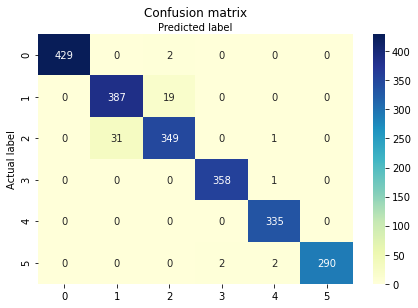

In [38]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Checking Model's Accuracy on Test Set (KNN)**


In [39]:
X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values
y_pred_validation=model.predict(X_validation)

print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))

testing_accuracy_dict["KNN"] = metrics.accuracy_score(y_pred_validation, y_validation)

Accuracy: 0.7964031218187988


In [40]:
cnf_matrix = confusion_matrix(y_validation, y_pred_validation)

Text(0.5, 257.44, 'Predicted label')

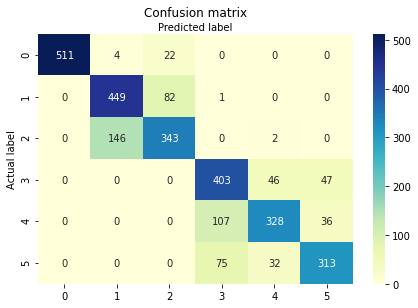

In [41]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
testing_accuracy_dict

{'KNN': 0.7964031218187988, 'Logistic_Regression': 0.9504580929759077}

# **Naive Bayes Classifier**

In [43]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb_classifier = GaussianNB()

#Train the model using the training sets
gnb_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb_classifier.predict(X_test)

# **Checking Model's Accuracy on Training Set (Naive Bayes)**


In [44]:
training_accuracy_dict["Naive_Bayes"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6518585675430644


In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

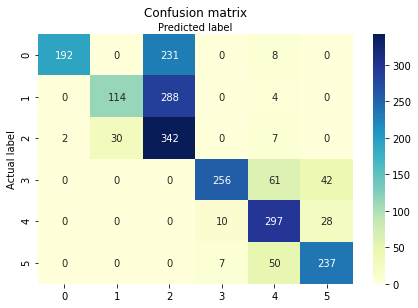

In [46]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6518585675430644
Recall Score :  0.6518585675430644


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# **Checking Model's Accuracy on Test Set (Naive Bayes)**


In [48]:
X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values
y_pred_validation=gnb_classifier.predict(X_validation)

testing_accuracy_dict["Naive_Bayes"] = metrics.accuracy_score(y_pred_validation, y_validation)


print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))


Accuracy: 0.6861214794706482


Text(0.5, 257.44, 'Predicted label')

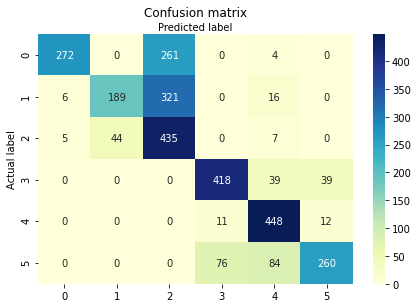

In [49]:
cnf_matrix = confusion_matrix(y_validation, y_pred_validation)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier

In [51]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

# **Checking Model's Accuracy on Training Set (Decision Tree)**


In [52]:
training_accuracy_dict["Decision_Tree"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9374433363553943


Text(0.5, 257.44, 'Predicted label')

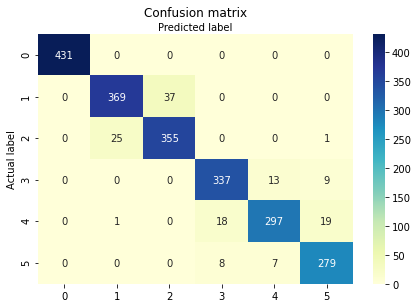

In [53]:
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Using attribute selection measure "Entropy"**

In [54]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.886672710788758


Text(0.5, 257.44, 'Predicted label')

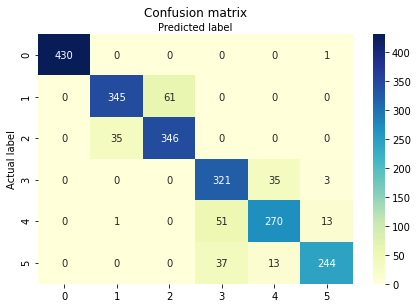

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Checking Model's Accuracy on Test Set (Decision Tree)**


In [56]:
X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values
y_pred_validation = dtc.predict(X_validation)

testing_accuracy_dict["Decision_Tree"] = metrics.accuracy_score(y_pred_validation, y_validation)


print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))


Accuracy: 0.8126908720732948


Text(0.5, 257.44, 'Predicted label')

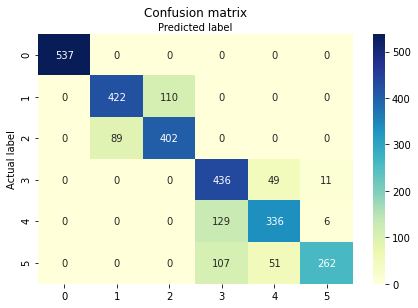

In [57]:
cnf_matrix = confusion_matrix(y_validation, y_pred_validation)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [59]:
text_representation = tree.export_text(dtc)
print(text_representation)


|--- feature_389 <= -0.97
|   |--- feature_52 <= 0.10
|   |   |--- class: 1
|   |--- feature_52 >  0.10
|   |   |--- feature_559 <= 0.14
|   |   |   |--- class: 3
|   |   |--- feature_559 >  0.14
|   |   |   |--- class: 2
|--- feature_389 >  -0.97
|   |--- feature_508 <= -0.52
|   |   |--- feature_74 <= 0.56
|   |   |   |--- class: 4
|   |   |--- feature_74 >  0.56
|   |   |   |--- class: 5
|   |--- feature_508 >  -0.52
|   |   |--- feature_159 <= 0.28
|   |   |   |--- class: 6
|   |   |--- feature_159 >  0.28
|   |   |   |--- class: 5



In [60]:
x = list(data.columns)
feature_names = x[:-1]
target_name = x[-1]

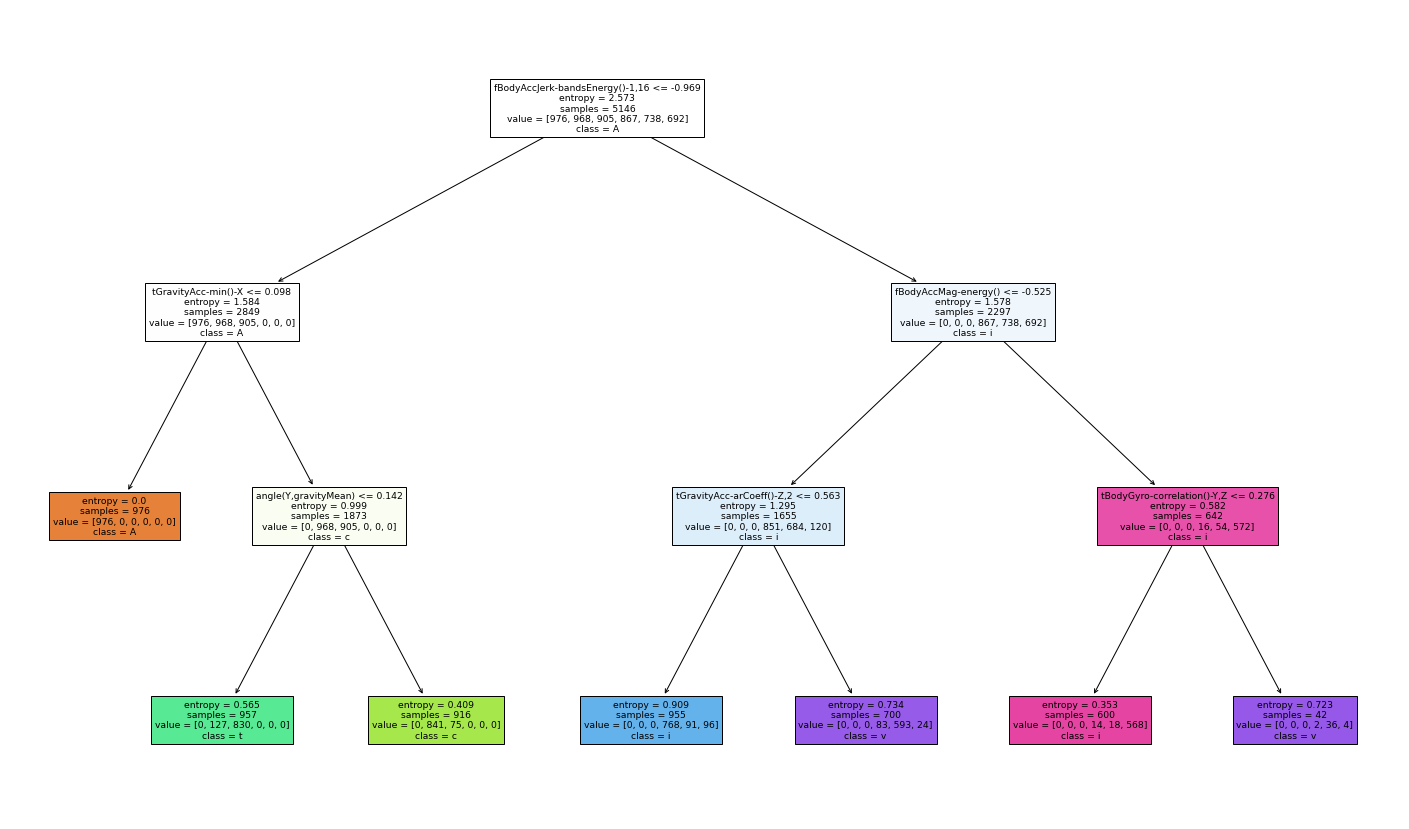

In [61]:

fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(dtc, 
                   feature_names=feature_names,  
                   class_names=target_name,
                   filled=True)

# **Random Forest Classifier**

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model =RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# **Checking Model's Accuracy on Training Set (RFC)**


In [63]:
training_accuracy_dict["RFC"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9809610154125114


In [64]:
print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9809610154125114
Recall Score :  0.9809610154125114


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# **Checking Model's Accuracy on Test Set (RFC)**


In [65]:
X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values
y_pred_validation = model.predict(X_validation)

testing_accuracy_dict["RFC"] = metrics.accuracy_score(y_pred_validation, y_validation)

print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))


Accuracy: 0.9222938581608415


Text(0.5, 257.44, 'Predicted label')

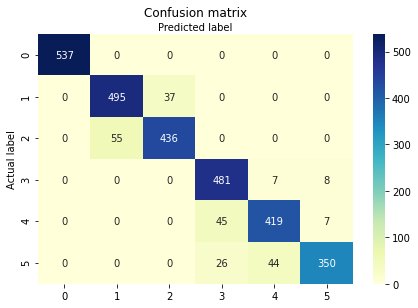

In [66]:
cnf_matrix = confusion_matrix(y_validation, y_pred_validation)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **SVM (Support Vector Machines)**

In [67]:
from sklearn import svm

#Create a svm Classifier
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)

# **Checking Model's Accuracy on Test Set (SVM)**


In [68]:
training_accuracy_dict["SVM"] = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.985494106980961


In [69]:
print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.985494106980961
Recall Score :  0.985494106980961


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# **Checking Model's Accuracy on Test Set (SVM)**


In [70]:
X_validation = test_Data.drop(labels = 'Activity',axis=1)
y_validation = test_Data['Activity'].replace(mapping).values
y_pred_validation = svm_classifier.predict(X_validation)

testing_accuracy_dict["SVM"] = metrics.accuracy_score(y_pred_validation, y_validation)

print("Accuracy:",metrics.accuracy_score(y_pred_validation, y_validation))


Accuracy: 0.9507974211062097


Text(0.5, 257.44, 'Predicted label')

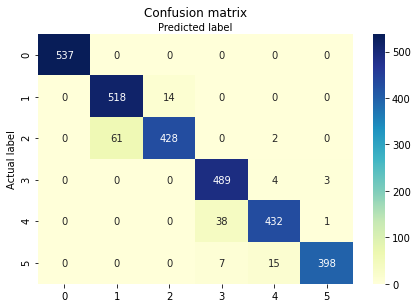

In [71]:
cnf_matrix = confusion_matrix(y_validation, y_pred_validation)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **ANN (Artifical Neural Network)**

In [72]:
from keras.models import Sequential
from keras.layers import Dense

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

n_input = X_train.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples = X_train.shape[0] # number of training samples
n_hidden_units = 40

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_output, activation="softmax"))

    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

(5146, 7)
(2206, 7)


In [90]:
estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(X_train, y_train)
print("Score: {}".format(estimator.score(X_test, y_test)))

Score: 0.9850407838821411


In [84]:
score = estimator.score(X_test, y_test)

In [85]:
training_accuracy_dict['ANN'] = score

In [97]:
validation_score = estimator.score(X_validation, y_validation)

In [91]:
validation_score

0.1835765242576599

In [99]:
testing_accuracy_dict['ANN'] = validation_score

In [100]:
testing_accuracy_dict

{'ANN': 0.21649134159088135,
 'Decision_Tree': 0.8126908720732948,
 'KNN': 0.7964031218187988,
 'Logistic_Regression': 0.9504580929759077,
 'Naive_Bayes': 0.6861214794706482,
 'RFC': 0.9222938581608415,
 'SVM': 0.9507974211062097}

# **Results**


In [101]:
training_accuracy_dict

{'ANN': 0.9800543785095215,
 'Decision_Tree': 0.9374433363553943,
 'KNN': 0.9737080689029919,
 'Logistic_Regression': 0.9782411604714415,
 'Naive_Bayes': 0.6518585675430644,
 'RFC': 0.9809610154125114,
 'SVM': 0.985494106980961}

In [102]:
testing_accuracy_dict

{'ANN': 0.21649134159088135,
 'Decision_Tree': 0.8126908720732948,
 'KNN': 0.7964031218187988,
 'Logistic_Regression': 0.9504580929759077,
 'Naive_Bayes': 0.6861214794706482,
 'RFC': 0.9222938581608415,
 'SVM': 0.9507974211062097}

<BarContainer object of 7 artists>

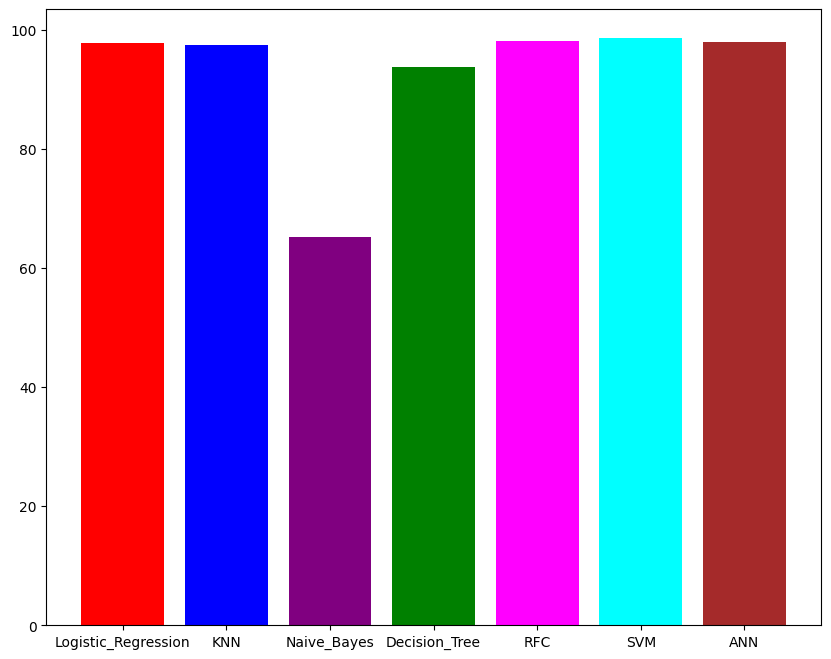

In [104]:
keys = training_accuracy_dict.keys()

values = training_accuracy_dict.values()
values = [i*100 for i in values]

plt.figure(figsize = (10,8))
plt.bar(keys, values,color=['red', 'blue', 'purple', 'green', 'fuchsia','cyan','brown'])

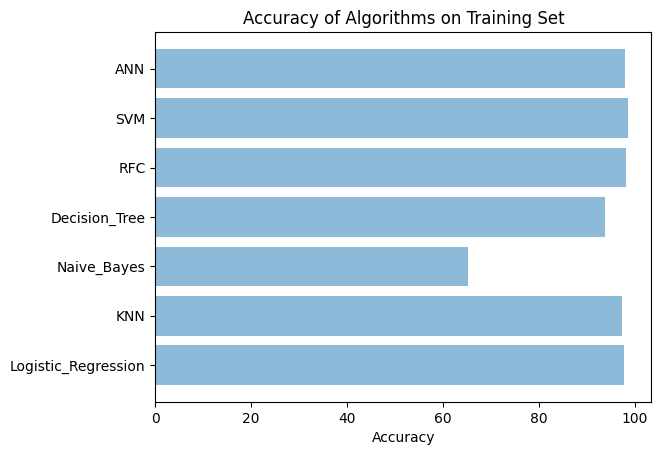

In [105]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



plt.barh(list(keys), values, align='center', alpha=0.5)
plt.yticks(list(keys))
plt.xlabel('Accuracy')
plt.title('Accuracy of Algorithms on Training Set')

plt.show()

<BarContainer object of 7 artists>

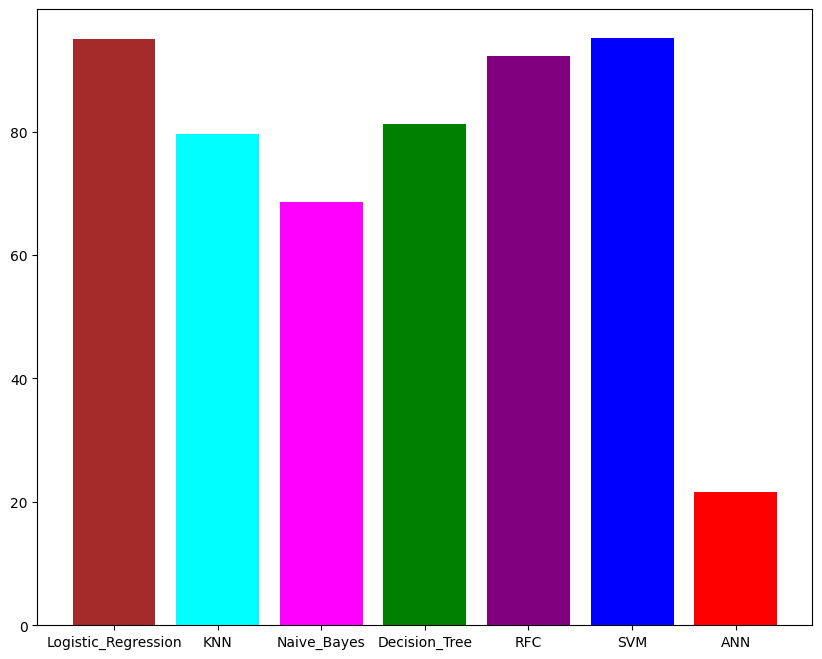

In [107]:
keys = testing_accuracy_dict.keys()

values = testing_accuracy_dict.values()
values = [i*100 for i in values]

plt.figure(figsize = (10,8))
color = ['red', 'blue', 'purple', 'green', 'fuchsia','cyan','brown']
color = color[::-1]
plt.bar(keys, values,color=color)

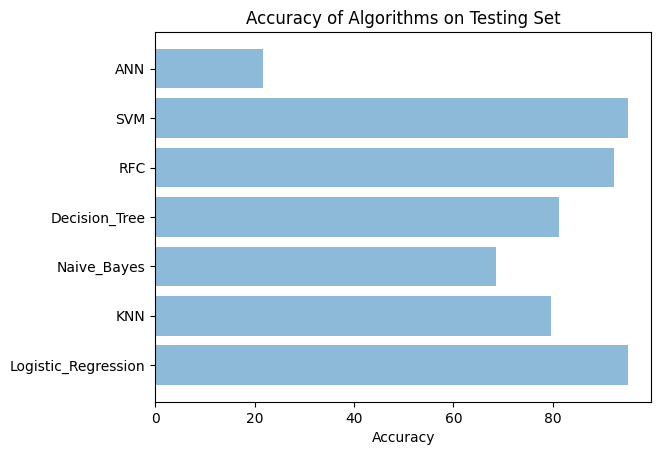

In [109]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



plt.barh(list(keys), values, align='center', alpha=0.5)
plt.yticks(list(keys))
plt.xlabel('Accuracy')
plt.title('Accuracy of Algorithms on Testing Set')

plt.show()